<img src='./img/LogoWekeo_Copernicus_RGB_0.png' align='right' width='20%'></img>

# Tutorial on climatologies and trends
In this tutorial we will use the WEkEO Jupyterhub to access and analyse data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S). The tutorial comprises the following steps:

1. [Search and download](#search_download) data using the CDS API: We will focus on ERA5 reanalysis data of 2 metre (near-surface) temperature.
2. [Read data](#read_data): Once downloaded, we will read and understand the data, including its variables and coordinates.
3. [View and plot data](#view_plot): We will see how the mean temperature varies globally, and how the Earth is warming by plotting time-series of global anomalies.
4. [Analyse data](#analyse_data) over the Arctic: We will focus on a subset over the Arctic and compare the rate of warming between seasons.

<img src='./img/map_1month_anomaly_Global_ea_2t_202010_title.jpg' align='center' width='100%'></img>

## <a id='search_download'></a>1. Search and download data

Before we begin we must prepare our environment. This includes installing the Application Programming Interface (API) of the CDS, and importing the various python libraries that we will need.

#### Install CDS API

To install the CDS API, run the following command. We use an exclamation mark to pass the command to the shell (not to the Python interpreter).

In [18]:
!pip install cdsapi

#### Import libraries

We will be working with data in NetCDF format. To best handle this data we will use libraries for working with multidimensional arrays, in particular Xarray. We will also need libraries for plotting and viewing data, in this case we will use Matplotlib and Cartopy.

In [19]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

import os
import sys
import json
from zipfile import ZipFile
import time
import base64
from IPython.core.display import HTML

import requests
import warnings
warnings.filterwarnings('ignore')

# <a id='read_data'></a> Select Option 1 (WEkEO API) or Option 2 (CDS API)

## <a id='read_data'></a> Option 1 WEkEO API

#### Get the API request

Each dataset on WEkEO is assigned a unique `datasetId`. Let us store the dataset ID for `ERA5 monthly averaged data on single levels from 1979 to present` as a variable called `dataset_id` to be used later.

In [3]:
dataset_id = "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS"

#### Get the WEkEO API key

In order to interact with WEkEO's Harmonised Data Access API, each user gets assigned an `API key` and `API token`. You will need the API key in order to download data in a programmatic way.

The `api key` is generated by encoding your `username` and `password` to Base64. You can use the function [generate_api_key](./hda_api_functions.ipynb#generate_api_key) to programmatically generate your Base64-encoded api key. For this, you have to replace the 'username' and 'password' strings with your WEkEO username and password in the cell below.

Alternatively, you can go to this [website](https://www.base64encode.org/) that allows you to manually encode your `username:password` combination. An example of an encoded key is `wekeo-test:wekeo-test`, which is encoded to `d2VrZW8tdGVzdDp3ZWtlby10ZXN0`.

In [4]:
from ipynb.fs.full.hda_api_functions import *

user_name = 'USERNAME'
password =  'PASSWORD'

In [ ]:
api_key = generate_api_key(user_name, password)
api_key

#### Initialise the Harmonised Data Access (HDA) API request

In order to initialise an API request, you have to initialise a dictionary that contains information on `dataset_id`, `api_key` and `download_directory_path`.

Please enter the path of the directory where the data shall be downloaded to.

In [6]:
# Enter here the directory path where you want to download the data to
download_dir_path = os.getcwd()

With `dataset_id`, `api_key` and `download_dir_path`, you can initialise the dictionary with the function [init](./hda_api_functions.ipynb#init).

In [7]:
hda_dict = init(dataset_id, api_key, download_dir_path)

#### Request access token

Once initialised, you can request an access token with the function [get_access_token](./hda_api_functions.ipynb#get_access_token). The access token is stored in the `hda_dict` dictionary.

You might need to accept the Terms and Conditions, which you can do with the function [acceptTandC](./hda_api_functions.ipynb#acceptTandC).

In [ ]:
hda_dict = get_access_token(hda_dict)

#### Accept Terms and Conditions (if applicable)

In [ ]:
hda_dict = acceptTandC(hda_dict)

#### Load data descriptor file and request data

The Harmonised Data Access API can read your data request from a dictionary. In this dictionary, you can describe the dataset you are interested in downloading.

In [ ]:
data = {
  "datasetId": "EO:ECMWF:DAT:REANALYSIS_ERA5_SINGLE_LEVELS_MONTHLY_MEANS",
  "boundingBoxValues": [
    {
      "name": "area",
      "bbox": [
        0,
        -90,
        360,
        90
      ]
    }
  ],
  "stringChoiceValues": [
    {
      "name": "format",
      "value": "netcdf"
    }
  ],
  "multiStringSelectValues": [
    {
      "name": "time",
      "value": [
        "00:00"
      ]
    },
    {
      "name": "day",
      "value": [
        "01"
      ]
    },
    {
      "name": "month",
      "value": [
        "10",
        "11",
        "12",
        "01",
        "02",
        "03",
        "09",
        "06",
        "05",
        "08",
        "07",
        "04"
      ]
    },
    {
      "name": "product_type",
      "value": [
        "monthly_averaged_reanalysis"
      ]
    },
    {
      "name": "variable",
      "value": [
        "2m_temperature"
      ]
    },
    {
      "name": "year",
      "value": [
        "1979",
        "1980",
        "1981",
        "1982",
        "1983",
        "1984",
        "1985",
        "1986",
        "1987",
        "1988",
        "1989",
        "1990",
        "1991",
        "1992",
        "1993",
        "1994",
        "1995",
        "1996",
        "1997",
        "1998",
        "1999",
        "2000",
        "2001",
        "2002",
        "2003",
        "2004",
        "2005",
        "2006",
        "2007",
        "2008",
        "2009",
        "2010",
        "2011",
        "2012",
        "2013",
        "2014",
        "2015",
        "2016",
        "2017",
        "2018",
        "2019"
      ]
    }
  ]
}
data

#### Initiate the request by assigning a job ID

The function [get_job_id](./hda_api_functions.ipynb#get_job_id) will launch your data request and your request is assigned a `job ID`.

In [ ]:
hda_dict = get_job_id(hda_dict,data)

#### Build list of file names to be ordered and downloaded

The next step is to gather a list of file names available, based on your assigned `job ID`. The function [get_results_list](./hda_api_functions.ipynb#get_results_list) creates the list.

In [ ]:
hda_dict = get_results_list(hda_dict)

#### Create an `order ID` for each file to be downloaded

The next step is to create an `order ID` for each file name to be downloaded. You can use the function [get_order_ids](./hda_api_functions.ipynb#get_order_ids).

In [ ]:
hda_dict = get_order_ids(hda_dict)

#### Download requested data

As a final step, you can use the function [download_data](./hda_api_functions.ipynb#download_data) to initialize the data download and to download each file that has been assigned an `order ID`. 

In [ ]:
download_data(hda_dict)

## <a id='read_data'></a> Option 2 CDS API

#### Enter your CDS API key

Before you can request data from the CDS, you will need to register on the CDS website and obtain a User ID and API Key. In order to do so, please follow the steps at this link:
https://cds.climate.copernicus.eu/api-how-to

Once you have a User ID and API Key, please enter them in the fields below by replacing "UID" with your User ID, and API_KEY with your API Key.

In [22]:
!echo "url: https://cds.climate.copernicus.eu/api/v2" > ~/.cdsapirc
!echo "key: UID:API_KEY" >> ~/.cdsapirc

#### Search for data

To search for data, visit the CDS website: http://cds.climate.copernicus.eu
Here you can search for ERA5 data using the search bar. The data we need for this tutorial is the ERA5 monthly averaged data on single levels from 1979 to present.

<img src='./img/CDS.jpg' align='left' width='45%'></img> <img src='./img/CDS_ERA5.jpg' align='right' width='45%'></img> 

Having selected the correct dataset, we now need to specify what product type, variables, temporal and geographic coverage we are interested in. These can all be selected in the **"Download data"** tab. In this tab a form appears in which we will select the following parameters to download:

- Product type: `Monthly averaged reanalysis`
- Variable: `2m temperature`
- Year: `1979 to 2019`
- Month: `all`
- Time: `00:00` (default)
- Geographical area: `Whole available region` 
- Format: `NetCDF`

<img src='./img/Notebook2_data.png' align='center' width='100%'></img>

At the end of the download form, select **"Show API request"**. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook (see cell below) ...

#### Download data

... having copied the API request into the cell below, running this will retrieve and download the data you requested into your local directory.

In [23]:
c = cdsapi.Client()

In [24]:
c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': '2m_temperature',
        'year': [
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'format': 'netcdf',
    },
    'era5_monthly_t2m.nc')

2021-05-12 09:25:16,075 INFO Welcome to the CDS
2021-05-12 09:25:16,077 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2021-05-12 09:25:16,200 INFO Request is completed
2021-05-12 09:25:16,201 INFO Downloading https://download-0014.copernicus-climate.eu/cache-compute-0014/cache/data2/adaptor.mars.internal-1620749095.2163737-14827-15-781fc53a-914f-4878-8942-f239fd4bd750.nc to era5_monthly_t2m.nc (974.3M)
2021-05-12 09:26:02,746 INFO Download rate 20.9M/s 


Result(content_length=1021639836,content_type=application/x-netcdf,location=https://download-0014.copernicus-climate.eu/cache-compute-0014/cache/data2/adaptor.mars.internal-1620749095.2163737-14827-15-781fc53a-914f-4878-8942-f239fd4bd750.nc)

## <a id='read_data'></a>2. Read Data

Now that we have downloaded the data, we can start to play ...

We have requested the data in NetCDF format. This is a commonly used format for array-oriented scientific data. 

To read and process this data we will make use of the Xarray library. Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun! We will read the data from our NetCDF file into an Xarray **"dataset"**

In [29]:
# Option WEkEO API
t2m = 'adaptor.mars.internal-1620660966.2440398-21838-1-358b5373-8d57-4d0e-9cab-e2a69d22287d.nc'

# Option CDS API (Comment Out)
#t2m = 'era5_monthly_t2m.nc'

In [30]:
# Create Xarray Dataset
ds = xr.open_dataset(t2m)

Now we can query our newly created Xarray dataset ...

In [31]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 492)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-05-10 15:39:24 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

We see that the dataset has one variable called **"t2m"**, which stands for "2 metre temperature", and three coordinates of **longitude**, **latitude** and **time**.

While an Xarray **dataset** may contain multiple variables, an Xarray **data array** holds a single multi-dimensional variable and its coordinates. To make the processing of the **t2m** data easier, we convert in into an Xarray data array.

In [32]:
# Create Xarray Data Array
da = ds['t2m']

## <a id='view_plot'></a>3. View and plot data

Now the fun part begins! Once our data is in the right format, there is no limit to what we can do with it! For example we can finally visualise the data to see what information it can provide.

#### View temporal mean for reference period

We will begin by creating a variable with the yearly means. Then we will extract the mean value for each geographic latitude and longitude for the period from 1981 to 2010. We will use this as a **reference period** with which to calculate **anomalies**.

Create a variable with the yearly means:

In [33]:
yearly_mean = da.groupby('time.year').mean('time')

Calculate mean temperature for a reference period of 1981 to 2010:

In [34]:
ref = yearly_mean.where((yearly_mean.year > 1980) & (yearly_mean.year < 2011), drop=True)
ref_mean = ref.mean(dim="year")

Let us plot this to see how the mean temperature for this period varies globally:

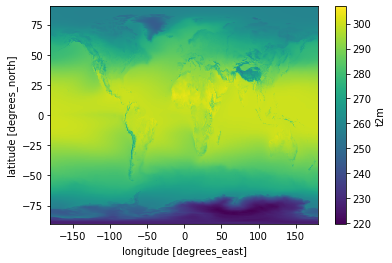

In [35]:
ref_mean.plot()

Notice the strong latitude gradient, and cold regions such as the Tibetan Plateau, the Andes and Greenland.

#### Plot global anomalies

We will now plot a global time series of annual temperature anomalies, defined as deviations in temperature from the reference mean.

Calculate the global mean for the reference period (1981 to 2010), and for the annual data from 1979 to 2019:

In [36]:
# global mean for reference period
ref_global = ref_mean.mean(["longitude", "latitude"])

# global mean for annual data
yearly_mean_global = yearly_mean.mean(["longitude", "latitude"])

We can now derive the anomalies by subtracting the global mean for the reference period from the annual means:

In [37]:
anomalies_global = yearly_mean_global - ref_global

Let's plot the annual global temperature anomalies over time, to see if there are any trends.

In [38]:
# Create a dashed horizontal line to show where the reference temperature lies
mean_line = xr.DataArray(0.0, coords=[('year', np.arange(1981,2010))])

Text(0.5, 1.0, 'Global anomalies of t2m from 1979 to 2019')

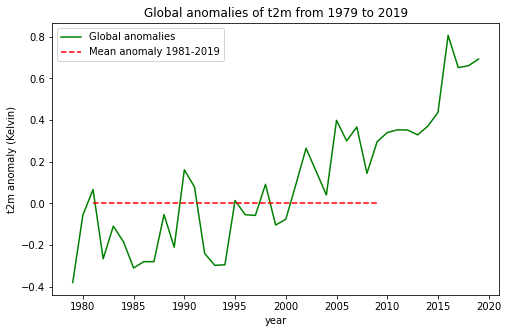

In [39]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot()
ax.set_ylabel('t2m anomaly (Kelvin)')
ax.set_xlabel('year')
ax.plot(anomalies_global.year, anomalies_global, color='green', label='Global anomalies')
ax.plot(mean_line.year, mean_line, color='red', linestyle='dashed', label='Mean anomaly 1981-2019')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Global anomalies of t2m from 1979 to 2019')

Notice a clear trend in global temperature!

## <a id='analyse_data'></a>4. Analyse data over the Arctic
We will now focus our attention over the Arctic. Here we will repeat the analysis above for this subset area. In addition, we will compare variations in the mean temperature of different seasons throughout the time series.

#### Plot mean Arctic temperature

First we have to create a subset for the Arctic Circle (above lat 66°33'N, or 66.55 in decimal degrees)

In [40]:
arctic = da.where(da.latitude >= 66.55, drop=True)

Calculate mean 2 metre temperature in period 1979 to 2019:

In [41]:
arctic_mean_1979_to_2019 = arctic.mean(dim="time")

Now let's plot this data in a map projection that facilitates visualisation of the Arctic:

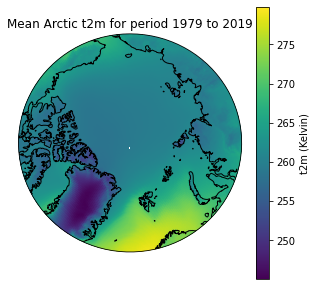

In [42]:
# create the figure panel 
fig = plt.figure(figsize=(5,5))
# create the map using the cartopy Orthographic projection, selecting the North Pole
ax = plt.subplot(1,1,1, projection=ccrs.Orthographic(central_latitude=90.0))
# add coastlines
ax.coastlines()
# compute a circle in axes coordinates, which we can use as a boundary for the map.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
# set boundary
ax.set_extent([-180,180, 66.55,90], crs=ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)
# provide a title
ax.set_title('Mean Arctic t2m for period 1979 to 2019')
# plot t2m
pp = plt.pcolormesh(arctic_mean_1979_to_2019.longitude, arctic_mean_1979_to_2019.latitude,
                    arctic_mean_1979_to_2019, cmap='viridis', transform=ccrs.PlateCarree())
# add colourbar
cbar = plt.colorbar(pp)
cbar.set_label(label='t2m (Kelvin)')

#### Plot monthly time series
Let's plot the monthly time series to see if we can identify any trends.

In [43]:
arctic_mean = arctic.mean(["longitude", "latitude"])

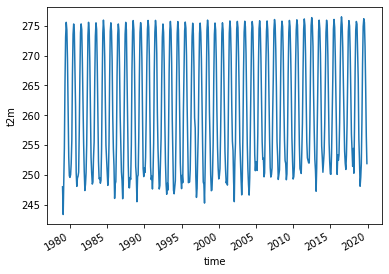

In [44]:
arctic_mean.plot()

Can you identify any global warming? The strong seasonal variations are evident throughout each year, but it is difficult to see any clear long-term trends.

#### Plot yearly time series
Now let's plot a time series of yearly averages. By removing the seasonal variations, perhaps we can identify some long-term trends.

In [45]:
arctic_yearly_mean = arctic_mean.groupby('time.year').mean('time')

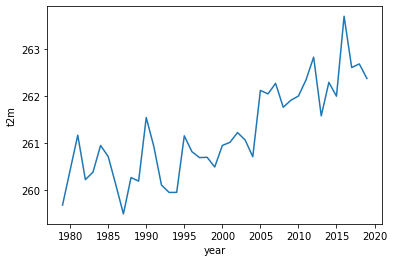

In [46]:
arctic_yearly_mean.plot()

Now we can clearly see a positive trend in warming throughout the time-series!

#### Plot seasonal time series

It may be interesting to compare trends in the mean temperature of different seasons throughout the time series. Do they vary? Are some seasons more constant over time, while others fluctuate?

In [47]:
# Create rolling average of three months
arctic_roll = arctic_mean.rolling(time=3, center=True).mean()

In [48]:
MAM = arctic_roll[3:-8:12] # MAM = March, April, May (Spring)
JJA = arctic_roll[6:-5:12] # JJA = June, July, August (Summer)
SON = arctic_roll[9:-2:12] # SON = September, October, November (Autumn)
DJF = arctic_roll[12:-11:12] # DJF = December, January, February (Winter)

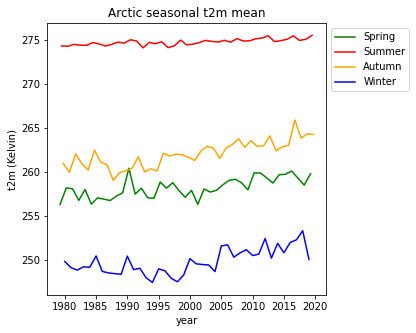

In [49]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()
ax.set_ylabel('t2m (Kelvin)')
ax.set_xlabel('year')
ax.plot(MAM.time, MAM, color='green', label='Spring')
ax.plot(JJA.time, JJA, color='red', label='Summer')
ax.plot(SON.time, SON, color='orange', label='Autumn')
ax.plot(DJF.time, DJF, color='blue', label='Winter')
ax.set_title('Arctic seasonal t2m mean')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1, 1), loc='upper left')

Note the difference in variability of seasonal mean t2m throughout the time series: mean summer temperatures are more constant than in other seasons.

<hr>

<p><img src='./img/all_partners_wekeo.png' align='left' alt='Logo EU Copernicus' width='100%'></img></p>